# EDA

https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/data

## Import, install and read

In [1]:
!pip install missingno

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/all_data.csv')
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
# df_sample = pd.read_csv('data/sample_submission.csv')
df_test_private = pd.read_csv('data/test_private_expanded.csv')
df_test_public = pd.read_csv('data/test_public_expanded.csv')
df_tox_annot = pd.read_csv('data/toxicity_individual_annotations.csv')
df_ident_annot = pd.read_csv('data/identity_individual_annotations.csv')
df_merged = pd.read_csv('data/merged_data.csv')

## Defining columns

In [4]:

main_columns = ['id', 'comment_text', 'split','toxicity']

subtype_columns = ['severe_toxicity', 'obscene', 'insult', 'threat','identity_attack','sexual_explicit']

identity_columns = ['male', 'female', 'transgender',
'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
'latino', 'other_race_or_ethnicity', 'physical_disability',
'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
'other_disability']

metadata_columns = ['created_date', 'publication_id',
'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
'disagree', 'identity_annotator_count',
'toxicity_annotator_count']


## Missing values

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

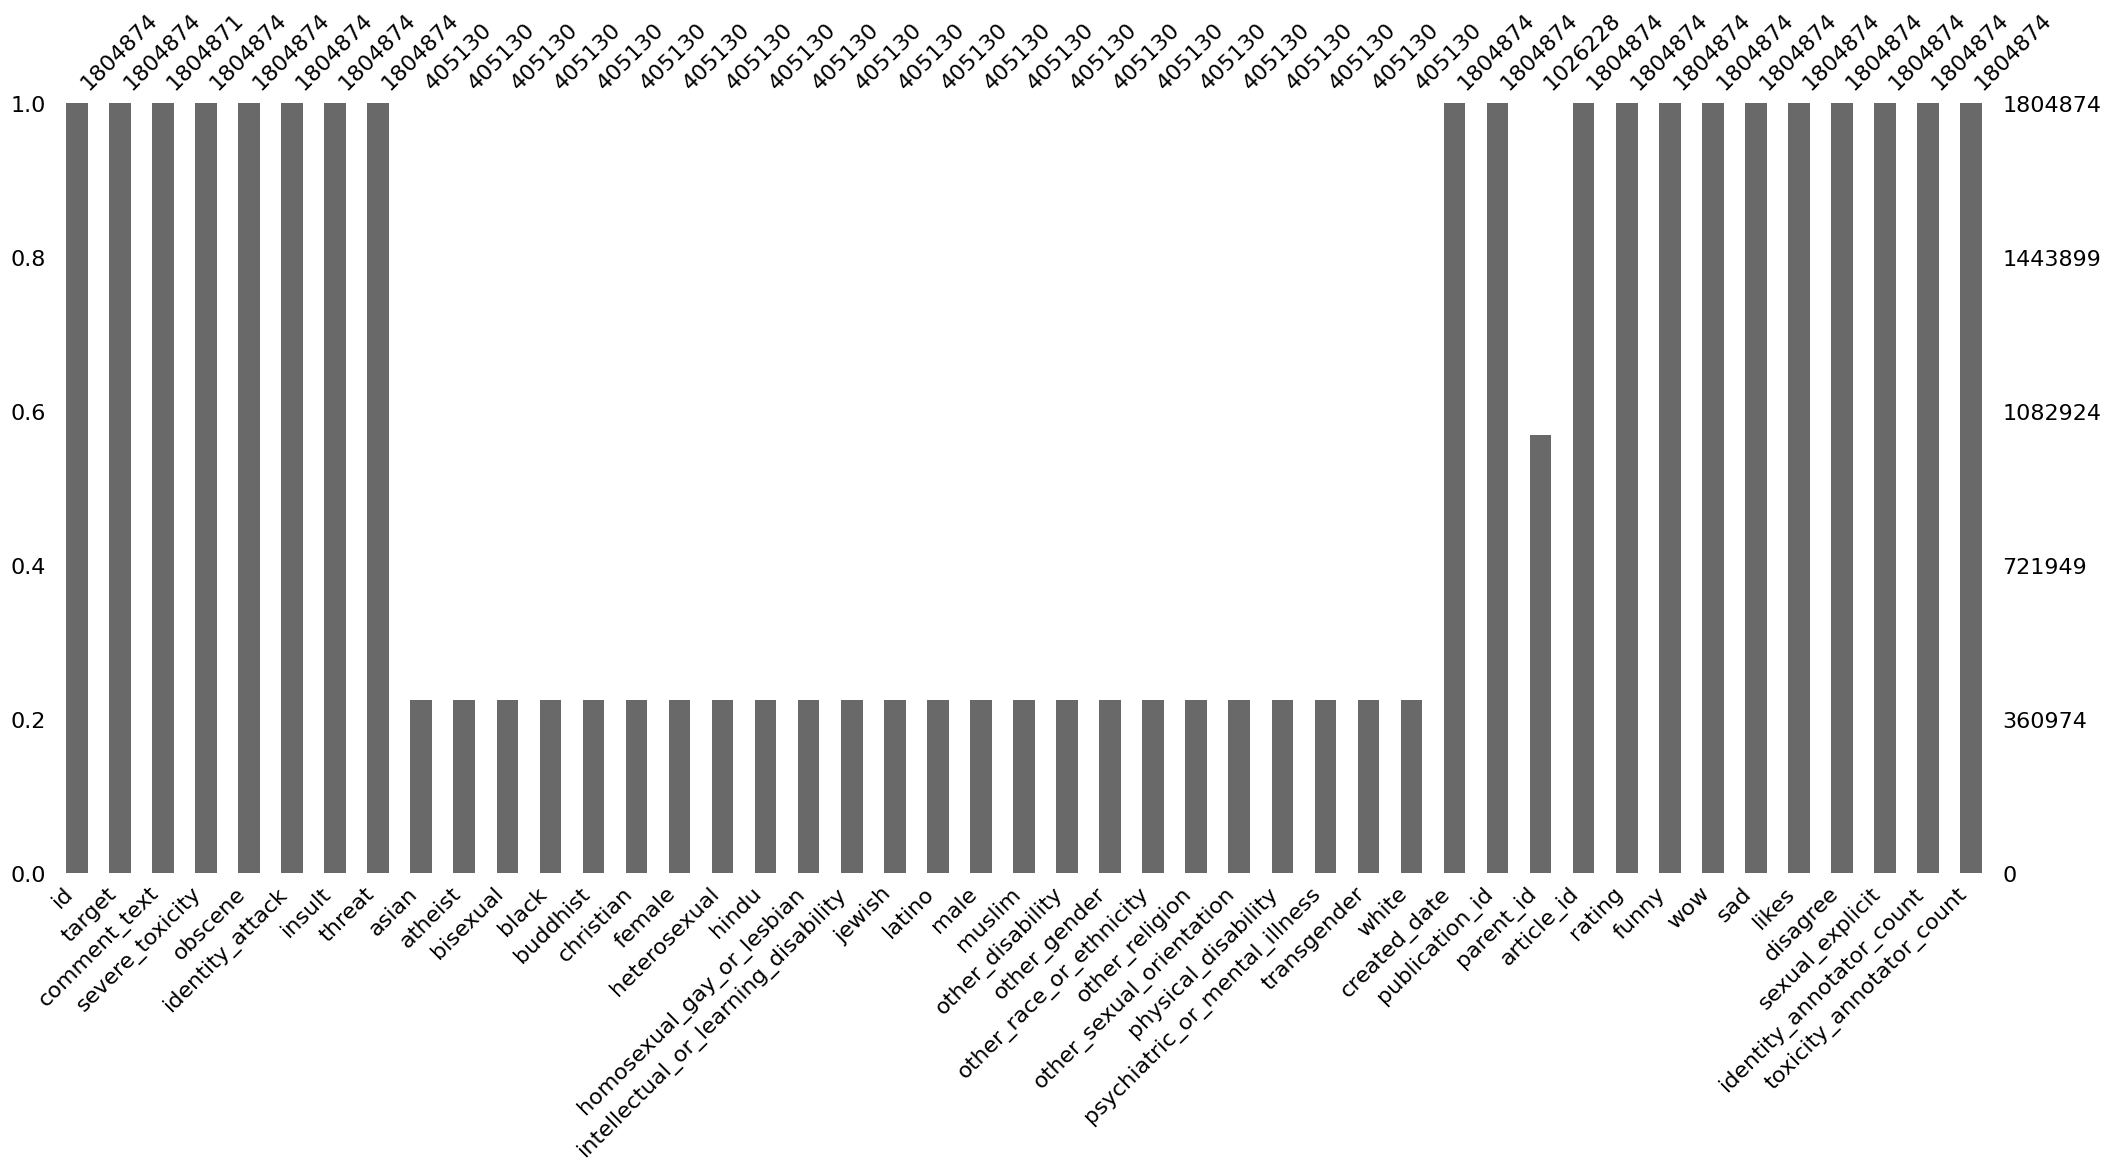

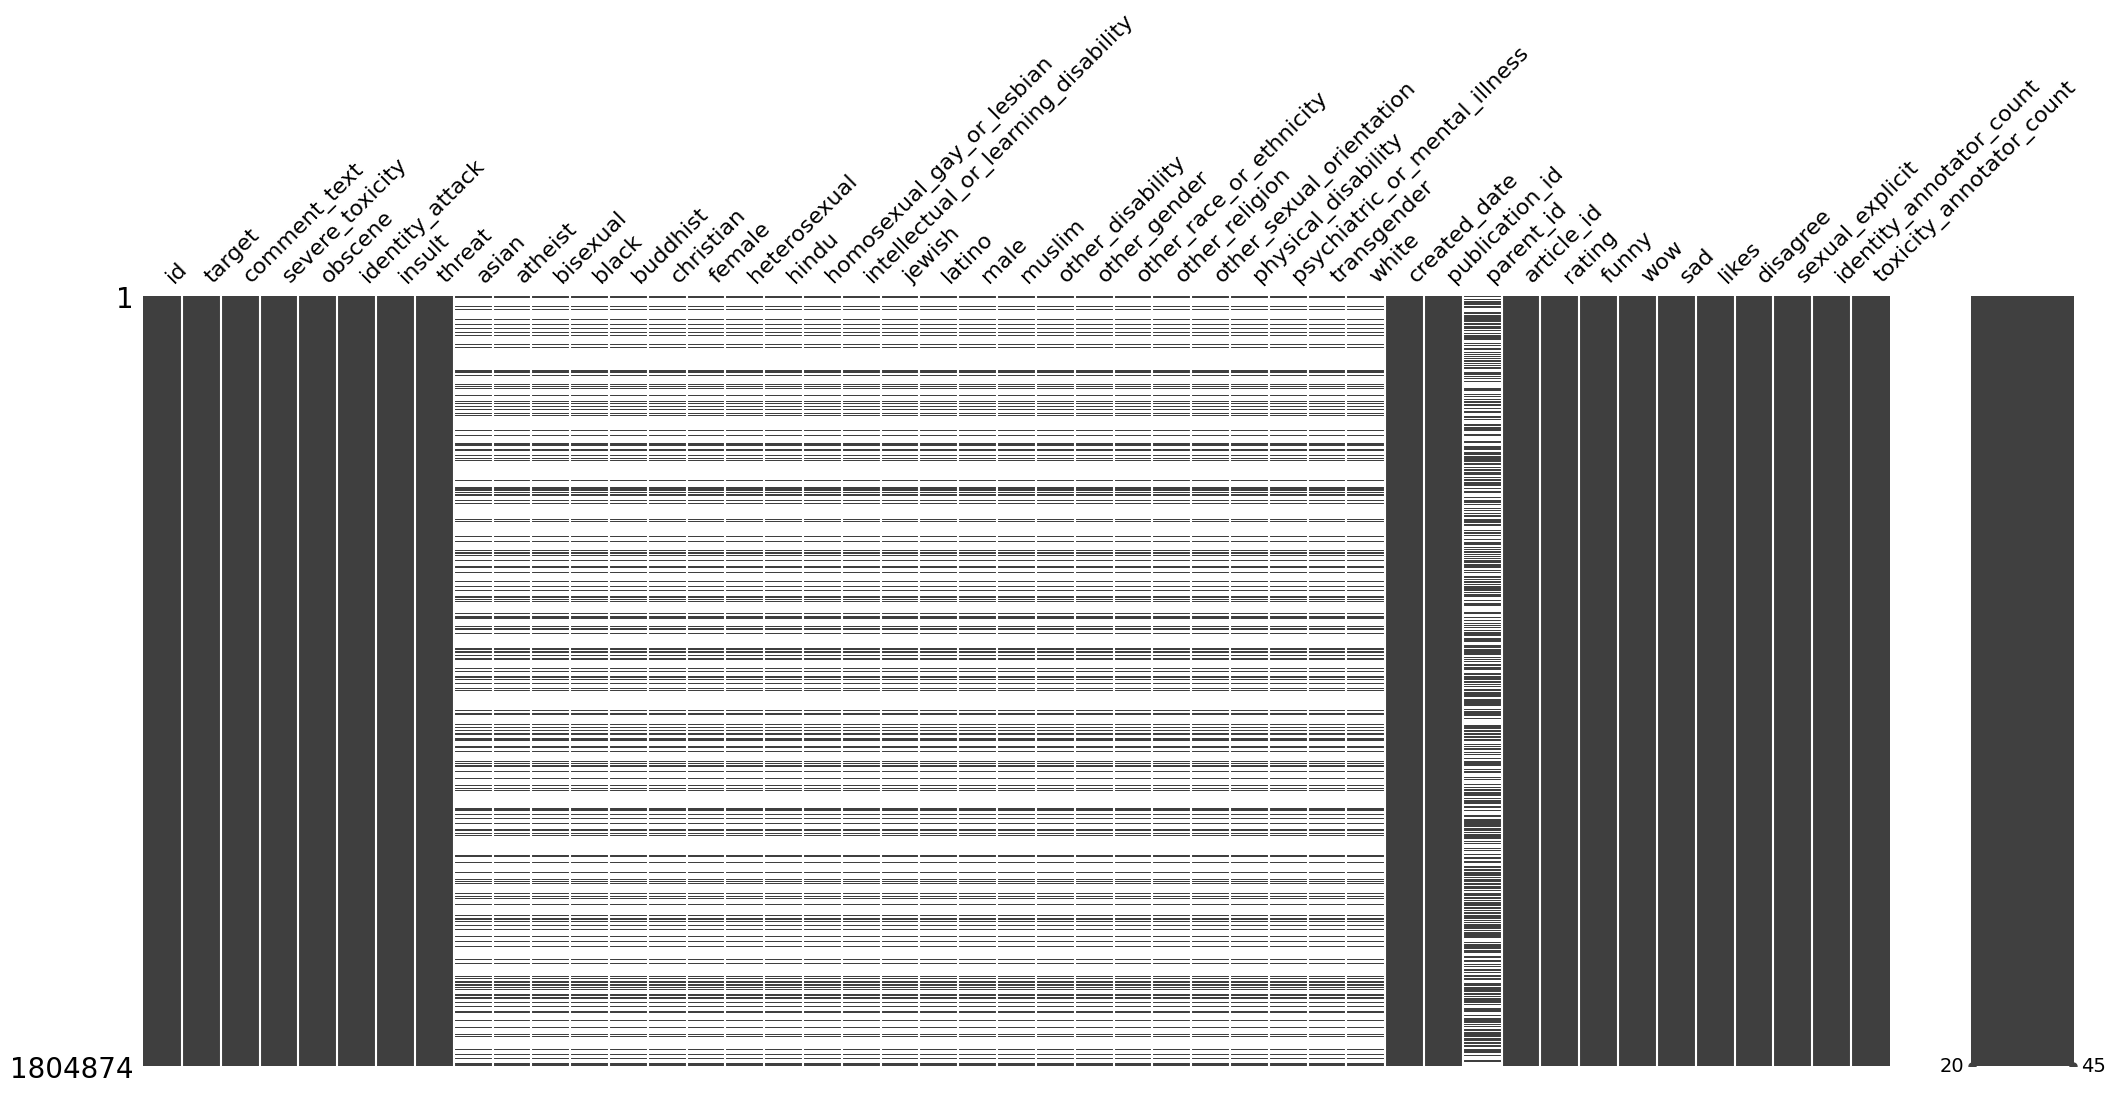

In [5]:
# overview of missing values
msno.bar(df_train)
msno.matrix(df_train)
df_train.isna().sum()

id                                           0
comment_text                                 4
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

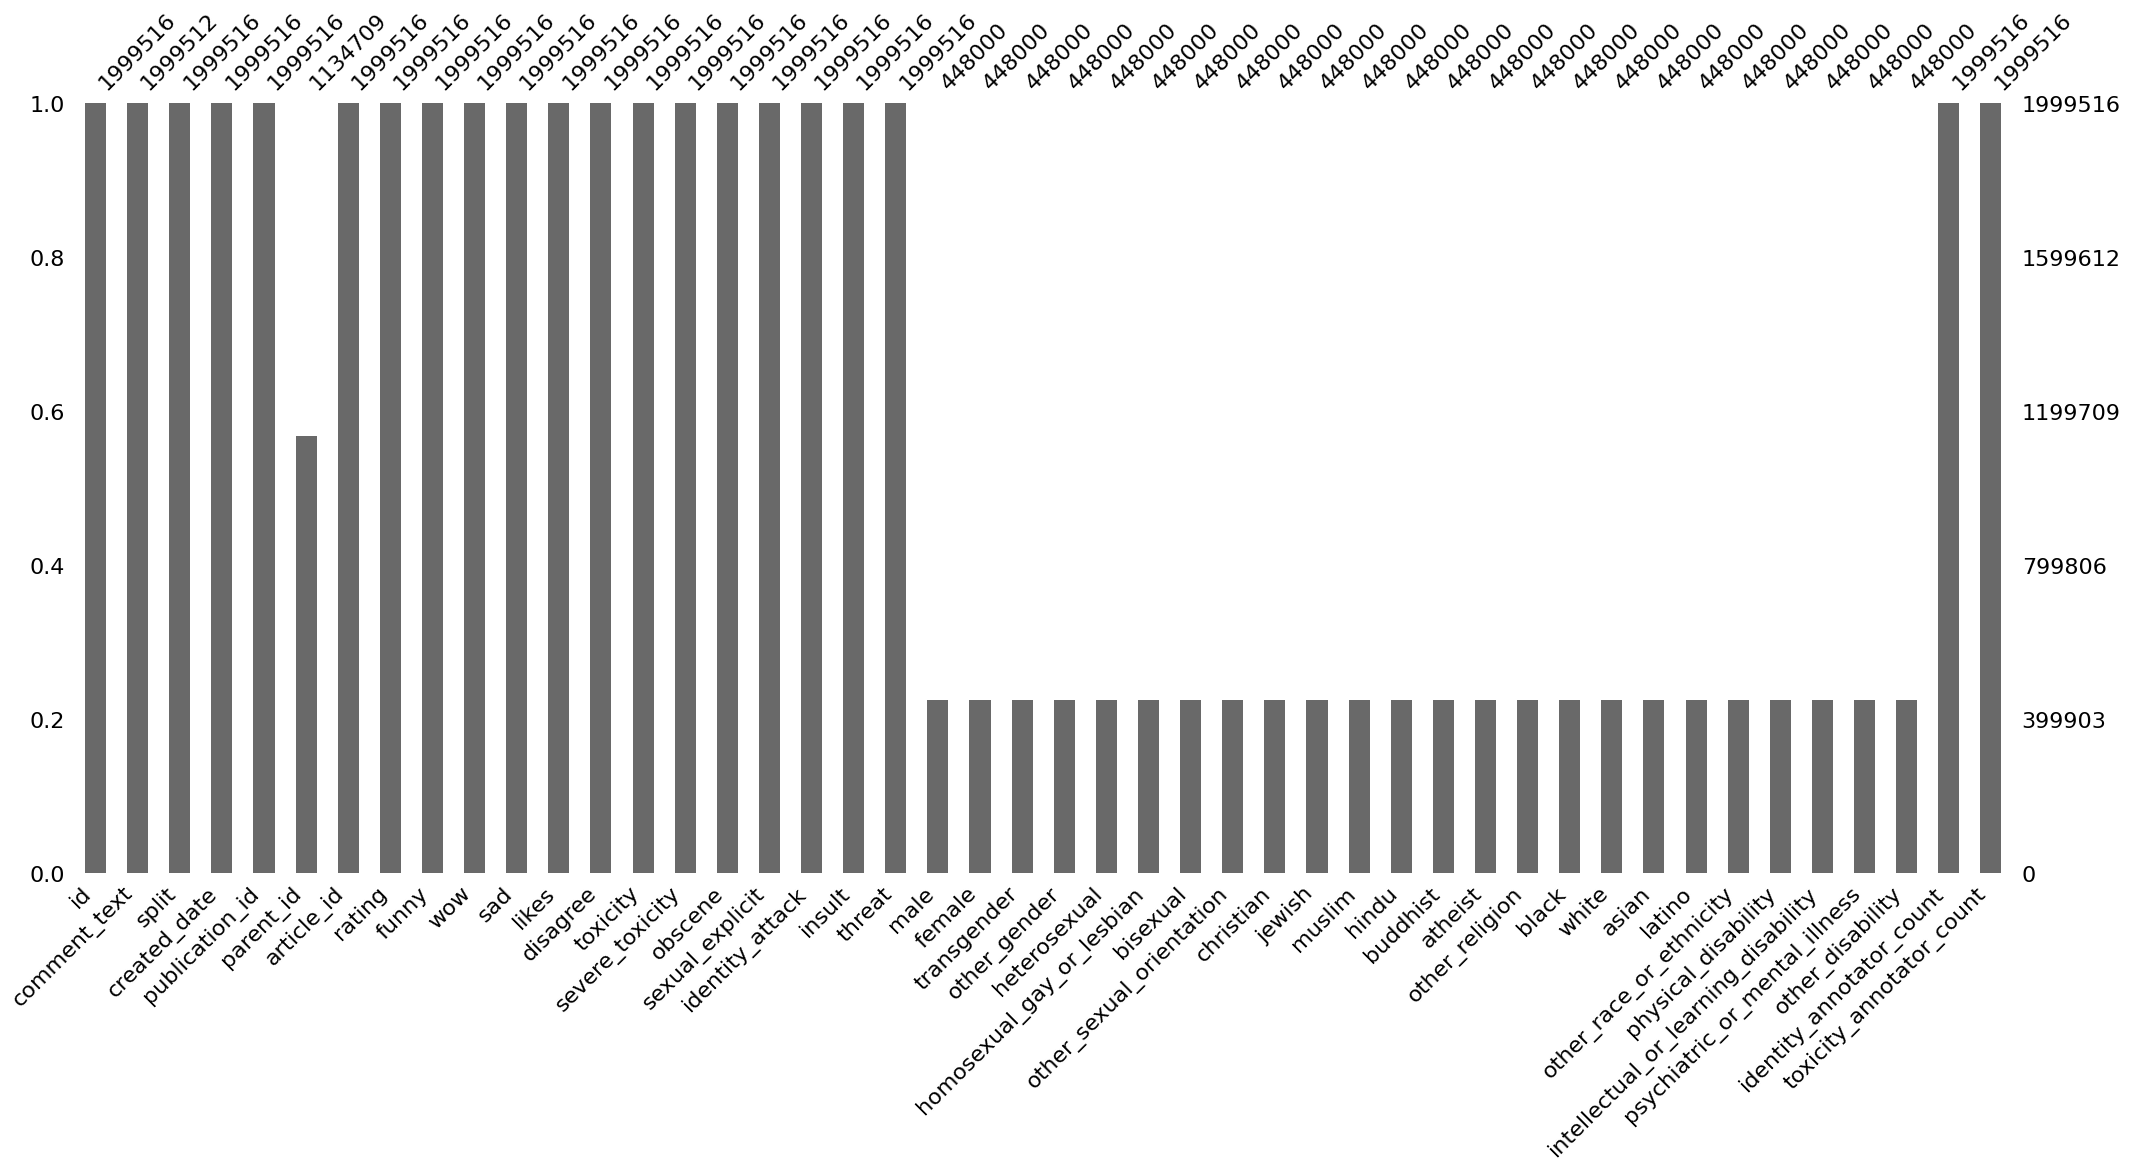

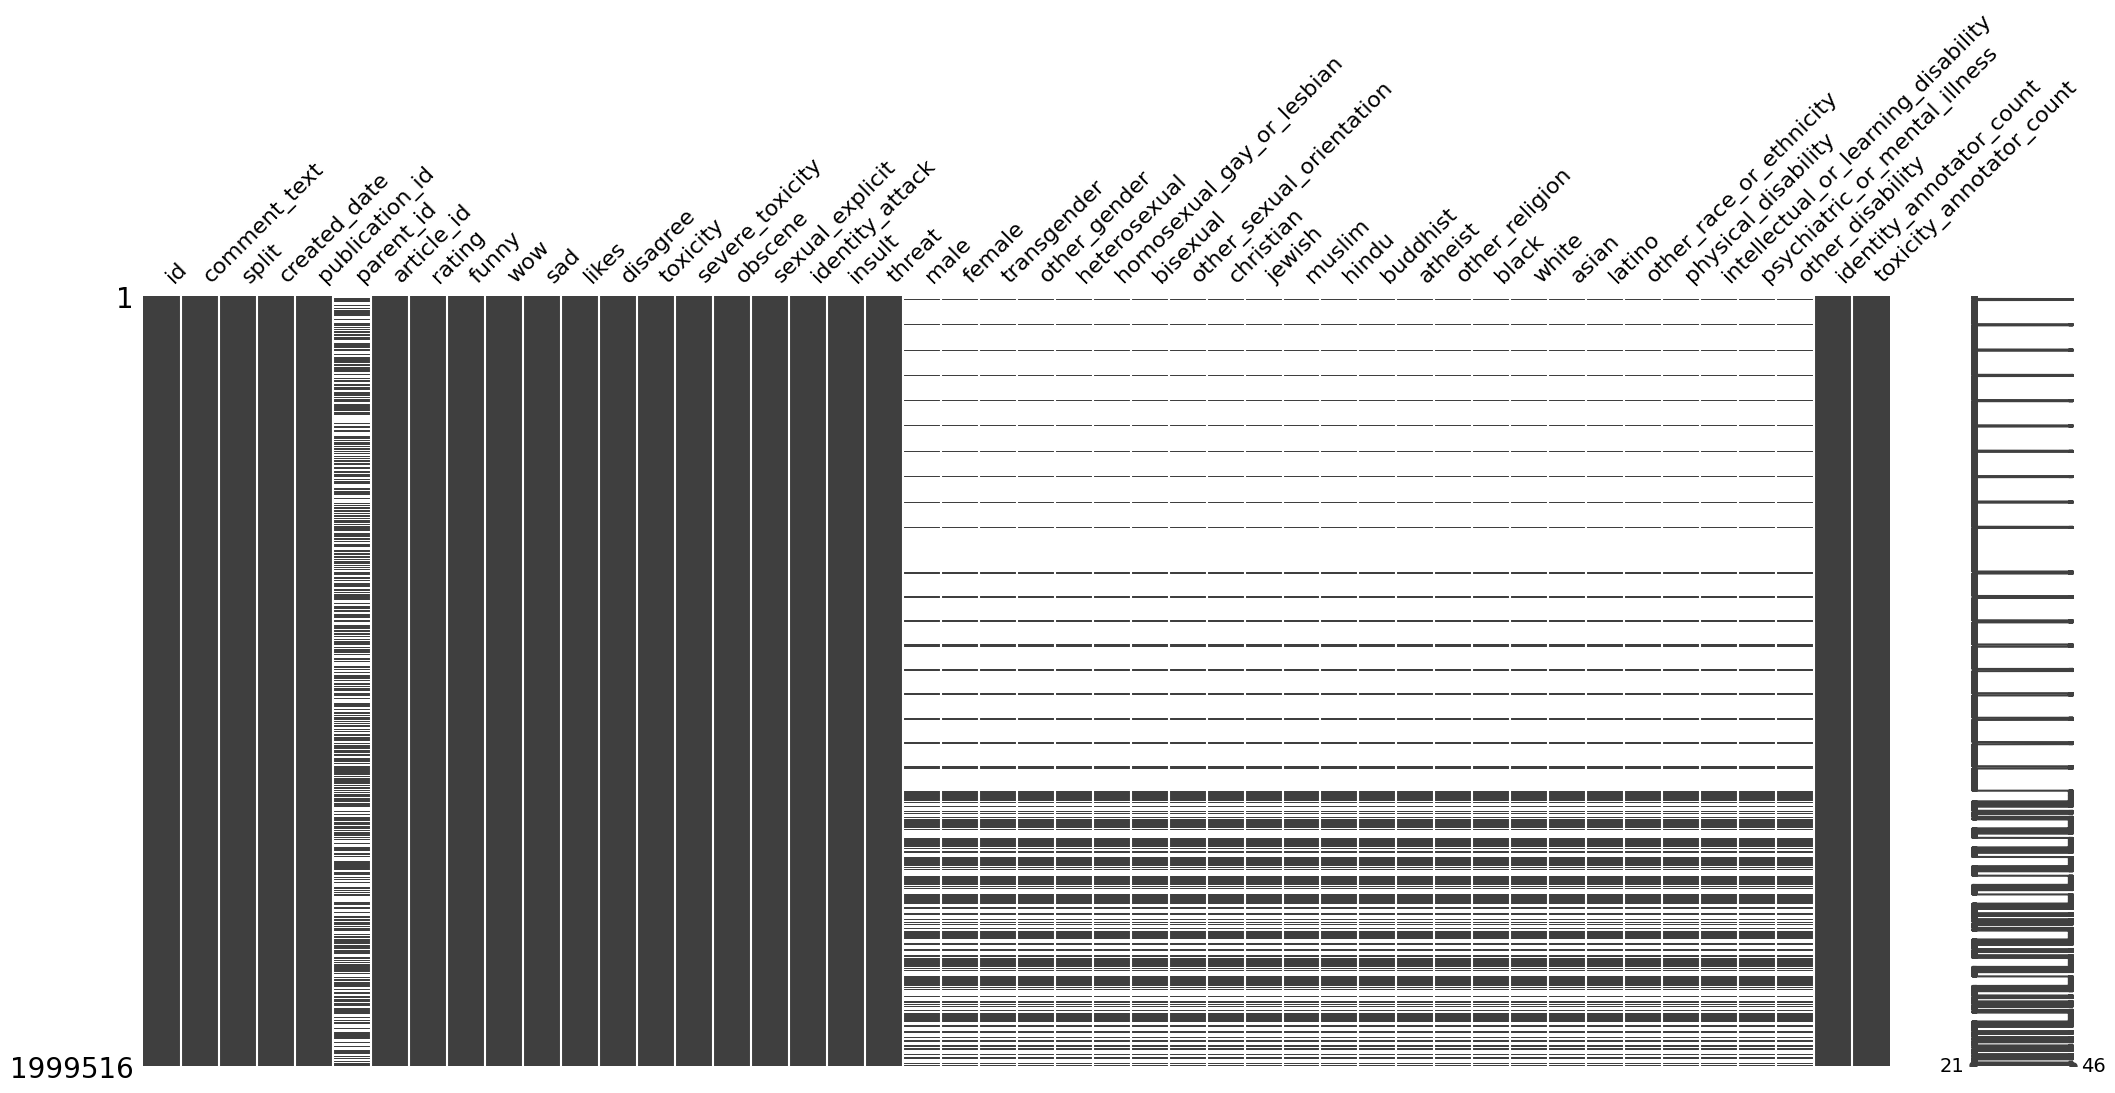

In [12]:
# overview of missing values
msno.bar(df)
msno.matrix(df)
df.isna().sum()

## Overview

In [7]:
#df_train[df_train["funny"] != 0].count()

df_train['wow'].nunique

<bound method IndexOpsMixin.nunique of 0          0
1          0
2          0
3          0
4          0
          ..
1804869    0
1804870    0
1804871    0
1804872    0
1804873    0
Name: wow, Length: 1804874, dtype: int64>

In [8]:
df.describe()

,id,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,toxicity,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
count,1.999516e+06,1.999516e+06,1.134709e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,...,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,1.999516e+06,1.999516e+06
mean,4.065400e+06,4.988997e+01,3.715138e+06,2.810257e+05,2.776687e-01,4.437174e-02,1.089289e-01,2.441188e+00,5.808151e-01,1.029241e-01,...,0.056534,0.011886,0.006151,0.008158,0.001351,0.001117,0.012068,0.001219,1.431667e+00,8.775720e+00
std,2.527563e+06,2.771895e+01,2.451507e+06,1.040778e+05,1.054819e+00,2.458644e-01,4.555570e-01,4.712994e+00,1.854332e+00,1.970386e-01,...,0.215175,0.086906,0.058828,0.042429,0.017461,0.016391,0.089072,0.014114,1.763593e+01,4.331605e+01
min,5.984800e+04,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+00
25%,8.565798e+05,2.100000e+01,7.930110e+05,1.600038e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
50%,5.340220e+06,5.400000e+01,5.217531e+06,3.319250e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
75%,5.955782e+06,5.400000e+01,5.774684e+06,3.662270e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.666667e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
max,7.194640e+06,1.150000e+02,6.333965e+06,3.995440e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,1.866000e+03,4.936000e+03


In [9]:
df_train['toxic'] = np.where(df_train['target'] >= 0.50, 1, 0)

In [10]:
#imbalanced data
counts = df_train['toxic'].value_counts()
counts


toxic
0    1660540
1     144334
Name: count, dtype: int64

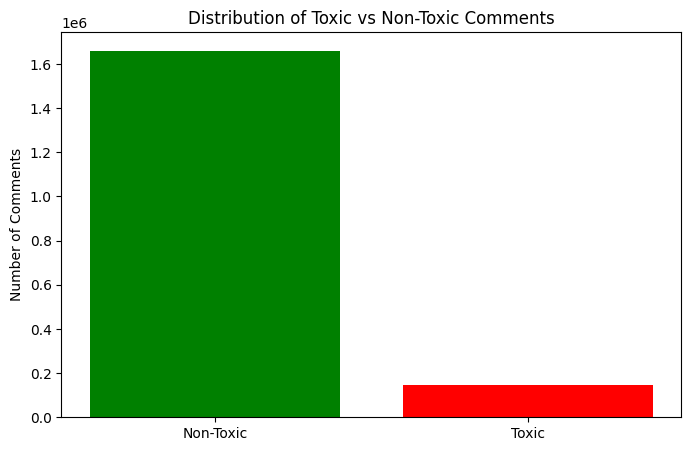

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.xticks(counts.index, ['Non-Toxic', 'Toxic'])
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.ylabel('Number of Comments')
plt.show()